In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [ ]:
df.isnull().count()

MODELYEAR                   1067
MAKE                        1067
MODEL                       1067
VEHICLECLASS                1067
ENGINESIZE                  1067
CYLINDERS                   1067
TRANSMISSION                1067
FUELTYPE                    1067
FUELCONSUMPTION_CITY        1067
FUELCONSUMPTION_HWY         1067
FUELCONSUMPTION_COMB        1067
FUELCONSUMPTION_COMB_MPG    1067
CO2EMISSIONS                1067
dtype: int64

# **Simple Linear Regression**

In [ ]:
X = df['ENGINESIZE']
y = df['CO2EMISSIONS']

In [ ]:
X

0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
1062    3.0
1063    3.2
1064    3.0
1065    3.2
1066    3.2
Name: ENGINESIZE, Length: 1067, dtype: float64

In [ ]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

210    4.3
150    2.0
549    5.0
319    2.4
681    3.7
      ... 
51     5.2
695    2.0
368    3.5
196    6.2
56     3.0
Name: ENGINESIZE, Length: 853, dtype: float64

In [ ]:
y_train

210    347
150    225
549    294
319    212
681    281
      ... 
51     409
695    184
368    267
196    258
56     285
Name: CO2EMISSIONS, Length: 853, dtype: int64

In [ ]:
X_train = X_train.values.reshape(-1,1)
X_train.shape

(853, 1)

In [ ]:
y_train = y_train.values.reshape(-1,1)
y_train.shape

(853, 1)

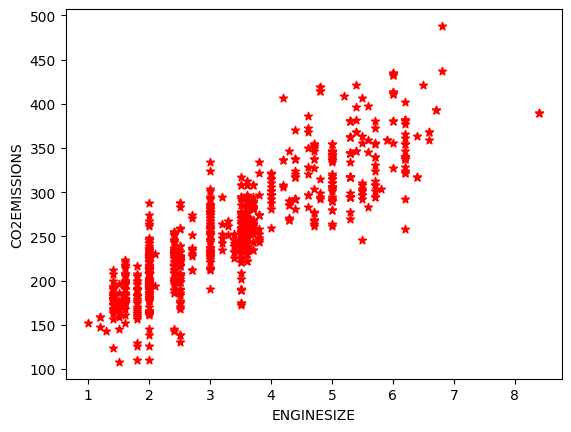

In [ ]:
plt.scatter(X_train, y_train, color='red', marker='*')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.predict([[1.5]])

array([[183.16327051]])

In [ ]:
predicted_test_data = lr.predict(X_test.values.reshape(-1,1))
predicted_test_data

array([[368.16593164],
       [265.82403399],
       [261.88780716],
       [273.69648766],
       [265.82403399],
       [187.09949734],
       [265.82403399],
       [340.61234382],
       [163.48213634],
       [202.84440467],
       [332.73989015],
       [265.82403399],
       [202.84440467],
       [242.206673  ],
       [265.82403399],
       [261.88780716],
       [194.971951  ],
       [297.31384865],
       [305.18630232],
       [261.88780716],
       [202.84440467],
       [265.82403399],
       [194.971951  ],
       [265.82403399],
       [265.82403399],
       [372.10215848],
       [202.84440467],
       [368.16593164],
       [328.80366332],
       [261.88780716],
       [222.52553883],
       [187.09949734],
       [194.971951  ],
       [254.01535349],
       [187.09949734],
       [289.44139499],
       [194.971951  ],
       [368.16593164],
       [348.48479748],
       [257.95158033],
       [344.54857065],
       [328.80366332],
       [242.206673  ],
       [368

In [ ]:
predicted_train_data = lr.predict(X_train)
predicted_train_data

array([[293.37762182],
       [202.84440467],
       [320.93120965],
       [218.589312  ],
       [269.76026083],
       [242.206673  ],
       [261.88780716],
       [265.82403399],
       [202.84440467],
       [368.16593164],
       [179.22704367],
       [320.93120965],
       [261.88780716],
       [183.16327051],
       [187.09949734],
       [242.206673  ],
       [348.48479748],
       [183.16327051],
       [202.84440467],
       [242.206673  ],
       [261.88780716],
       [320.93120965],
       [183.16327051],
       [202.84440467],
       [269.76026083],
       [261.88780716],
       [202.84440467],
       [281.56894132],
       [261.88780716],
       [281.56894132],
       [230.3979925 ],
       [194.971951  ],
       [230.3979925 ],
       [332.73989015],
       [218.589312  ],
       [297.31384865],
       [265.82403399],
       [222.52553883],
       [202.84440467],
       [179.22704367],
       [309.12252915],
       [242.206673  ],
       [368.16593164],
       [242

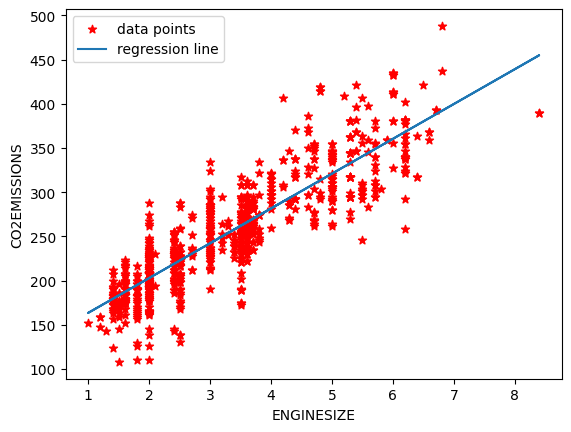

In [ ]:
plt.scatter(X_train, y_train, color='red', marker='*', label='data points')
plt.plot(X_train, predicted_train_data, label='regression line')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

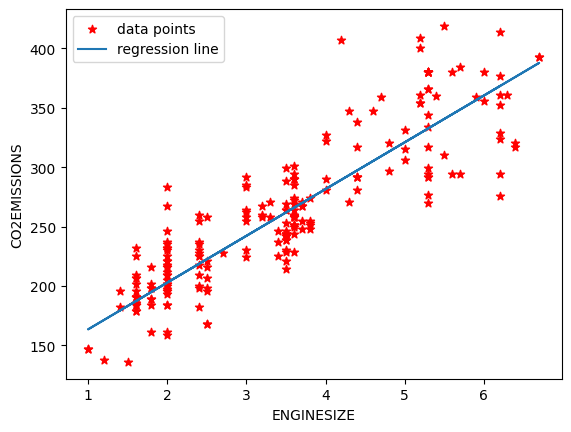

In [ ]:
plt.scatter(X_test, y_test, color='red', marker='*', label='data points')
plt.plot(X_test, predicted_test_data, label='regression line')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

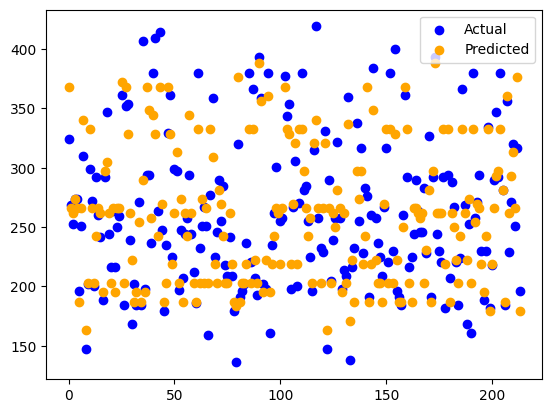

In [ ]:
l = np.arange(0, len(X_test))
plt.scatter(l, y_test, label="Actual", color='blue')
plt.scatter(l, predicted_test_data, label="Predicted", color="orange")
plt.legend()
plt.show()

In [ ]:
lr.coef_

array([[39.36226833]])

In [ ]:
lr.intercept_

array([124.11986801])

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test, predicted_test_data)

23.10905085801397

In [ ]:
metrics.mean_squared_error(y_test, predicted_test_data)

913.1470829552022

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, predicted_test_data))

30.21832362913605

In [ ]:
metrics.r2_score(y_test, predicted_test_data)

0.7694712876992804

# **Multiple Linear Regression**

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
X = df[['ENGINESIZE', 'CYLINDERS']]
X.head()

,ENGINESIZE,CYLINDERS
0,2.0,4
1,2.4,4
2,1.5,4
3,3.5,6
4,3.5,6


In [ ]:
y = df['CO2EMISSIONS']
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

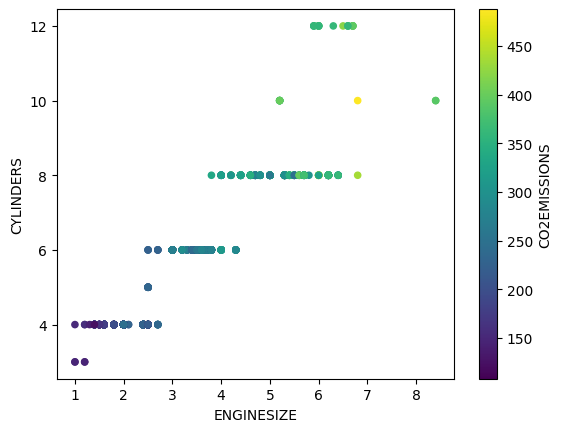

In [ ]:
df.plot.scatter(x='ENGINESIZE', y='CYLINDERS' ,c='CO2EMISSIONS', colormap='viridis')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
lr2 = LinearRegression()

In [ ]:
lr2.fit(X_train, y_train)

LinearRegression()

In [ ]:
train_pred = lr2.predict(X_train)
train_pred

array([265.32992032, 248.02469664, 248.02469664, 262.44571638,
       216.35235928, 213.46815533, 216.35235928, 201.93133954,
       322.96009321, 299.88646163, 248.02469664, 351.80213268,
       265.32992032, 190.39452375, 201.93133954, 268.21412427,
       331.61270505, 331.61270505, 184.62611586, 184.62611586,
       184.62611586, 343.14952084, 322.96009321, 314.30748137,
       201.93133954, 248.02469664, 351.80213268, 265.32992032,
       224.97801809, 386.30476793, 213.46815533, 201.93133954,
       213.46815533, 331.61270505, 322.96009321, 201.93133954,
       294.11805374, 201.93133954, 322.96009321, 213.46815533,
       262.44571638, 265.32992032, 190.39452375, 184.62611586,
       305.65486952, 265.32992032, 190.39452375, 253.79310453,
       190.39452375, 190.39452375, 331.61270505, 213.46815533,
       201.93133954, 196.16293165, 265.32992032, 357.57054058,
       285.51934795, 322.96009321, 213.46815533, 253.79310453,
       265.32992032, 265.32992032, 403.60999161, 184.62

In [ ]:
test_pred = lr2.predict(X_test)
test_pred

array([317.19168531, 265.32992032, 190.39452375, 394.95737977,
       248.02469664, 201.93133954, 201.93133954, 196.16293165,
       190.39452375, 265.32992032, 357.57054058, 190.39452375,
       285.51934795, 331.61270505, 294.11805374, 265.32992032,
       216.35235928, 196.16293165, 201.93133954, 351.80213268,
       262.44571638, 337.38111295, 196.16293165, 322.96009321,
       262.44571638, 276.86673611, 190.39452375, 262.44571638,
       268.21412427, 268.21412427, 265.32992032, 262.44571638,
       216.35235928, 190.39452375, 322.96009321, 343.14952084,
       334.496909  , 201.93133954, 262.44571638, 322.96009321,
       164.46364126, 299.88646163, 314.30748137, 201.93133954,
       190.39452375, 262.44571638, 256.67730848, 224.97801809,
       187.51031981, 262.44571638, 201.93133954, 268.21412427,
       351.80213268, 331.61270505, 213.46815533, 262.44571638,
       268.21412427, 201.93133954, 262.44571638, 357.57054058,
       268.21412427, 196.16293165, 190.39452375, 438.27

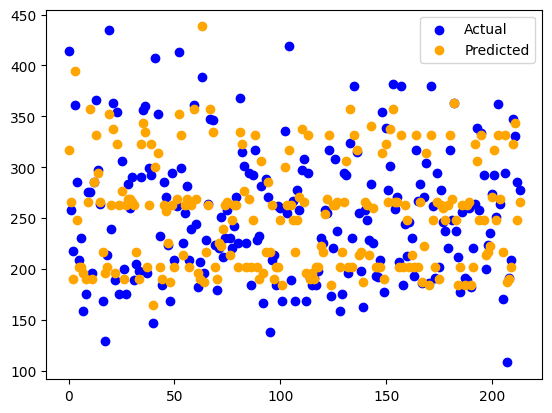

In [ ]:
l = np.arange(0, len(X_test))
plt.scatter(l, y_test, label="Actual", color='blue')
plt.scatter(l, test_pred, label="Predicted", color="orange")
plt.legend()
plt.show()

In [ ]:
lr2.coef_

array([28.84203947,  8.62565881])

In [ ]:
lr2.intercept_

109.74462535204685

In [ ]:
metrics.mean_absolute_error(y_test, test_pred)

24.825782613969988

In [ ]:
metrics.mean_squared_error(y_test, test_pred)

1064.2140303154015

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, test_pred))

32.622293455785744